In [93]:
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from pandas.core import datetools

import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# feature 24개

- fecha_dato : The table is partitioned for this column

- ncodpers : Customer code

- ind_empleado : Employee index A : active, B : ex-employed, F : filial, N : not employee, P : pasive #직원 여부

- pais_residencia : Customer's Country residence #거주지

- sexo : Customer's sex #성별

- age : Age #나이

- fecha_alta : The date in which the customer became as the first holder of a contract in the bank #처음 가입 날짜

- ind_nuevo : New customer Index. 1 if the customer registered in the last 6 months. #최근 6개월 가입 여부(신규가입자)

- antiguedad : Customer seniority (in months) #유지 개월 수

- indrel : 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month) #주고객층 여부

- ult_fec_cli_1t : Last date as primary customer (if he isn't at the end of the month) #주고객층이었던 마지막 날짜

- indrel_1mes : Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4(former co-owner) #고객 타입(주고객, 공동소유자, 잠재고객, 이전 주고객, 이전 공동소유자)

- tiprel_1mes : Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) #월초 고객 타입

- indresi : Residence index (S (Yes) or N (No) if the residence country is the same than the bank country) #거주지 인덱스 : 거주 국가와 은행 국가의 일치 여부

- indext : Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country) #외국인 인덱스 : 출생 국가와 은행 국가의 일치 여부

- conyuemp : Spouse index. 1 if the customer is spouse of an employee #배우자 인덱스 : 직원의 배우자인 경우

- canal_entrada : channel used by the customer to join #가입한 채널

- indfall : Deceased index. N/S #사망 여부

- tipodom : Addres type. 1, primary address #주소 타입 : 1일 경우 주요 주소

- cod_prov : Province code (customer's address) #거주지 지역 코드

- nomprov : Province name #지역 이름

- ind_actividad_cliente : Activity index (1, active customer; 0, inactive customer) #활동 인덱스 : 1, 0

- renta : Gross income of the household #총 수입

- segmento : segmentation: 01 - VIP, 02 - Individuals 03 - college graduated #구분 : VIP / 개인 / 대학졸업자

# Class 24개

- ind_ahor_fin_ult1 : Saving Account #저축통장
- ind_aval_fin_ult1 : Guarantees #보증
- ind_cco_fin_ult1 : Current Accounts #예금
- ind_cder_fin_ult1 : Derivada Account #파생계좌
- ind_cno_fin_ult1	Payroll Account #월급통장
- ind_ctju_fin_ult1 : Junior Account #어린이계좌
- ind_ctma_fin_ult1	: Más particular Account #특별계좌1
- ind_ctop_fin_ult1 : particular Account #특별계좌2
- ind_ctpp_fin_ult1 : particular Plus Account #특별계좌3
- ind_deco_fin_ult1 : Short-term deposits #단기예금
- ind_deme_fin_ult1 : Medium-term deposits #중기예금
- ind_dela_fin_ult1 : Long-term deposits #장기예금
- ind_ecue_fin_ult1	: e-account #온라인계좌
- ind_fond_fin_ult1	: Funds #펀드
- ind_hip_fin_ult1 : Mortgage #담보대출
- ind_plan_fin_ult1 : Pensions #연금 
- ind_pres_fin_ult1 : Loans #대출
- ind_reca_fin_ult1 : Taxes #세금 
- ind_tjcr_fin_ult1 : Credit Card #신용카드
- ind_valo_fin_ult1 : Securities #증권
- ind_viv_fin_ult1 : Home Account #내집마련계좌
- ind_nomina_ult1 : Payroll #월급
- ind_nom_pens_ult1 : Pensions #연금
- ind_recibo_ult1 : Direct Debit #자동이체

In [42]:
1.3e5

130000.0

In [43]:
limit_rows = 1000000
train = pd.read_csv("train.csv", dtype={"sexo":str, "ind_nuevo":str, 
                                  "ult_fec_cli_1t":str, 
                                  "indext":str}, nrows=limit_rows)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
train.ncodpers = train.ncodpers.astype(int)

In [ ]:
#Returns a random sample of items from an axis of object.
unique_ids = pd.Series(train["ncodpers"].unique()) #ncodpers : 고객넘버
unique_id = unique_ids.sample(n=1.3e5)
train = train[train.ncodpers.isin(unique_id)]

In [45]:
train["ncodpers"].count()

1000000

In [46]:
#pandas.to_numeric(arg, errors='raise', downcast=None)
#If ‘coerce’, then invalid parsing will be set as NaN
train["age"] = pd.to_numeric(train["age"], errors="coerce") 
train["antiguedad"] = pd.to_numeric(train["antiguedad"], errors="coerce") 
train["indrel_1mes"] = pd.to_numeric(train["indrel_1mes"], errors="coerce") 

In [49]:
train["age"].dtypes

dtype('float64')

### Missing Data

In [50]:
train.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                       10782
fecha_alta                10782
ind_nuevo                 10782
antiguedad                10782
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
segmento                  10895
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

In [51]:
train = train.drop(["ult_fec_cli_1t", "conyuemp"], axis=1)

In [52]:
train["renta"] = train["renta"].transform(lambda x: x.fillna(x.mean()))

In [53]:
train[train["antiguedad"] < 0] = 0

In [54]:
#total num of products
train["tot_products"] = train.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
train["tot_products"] = pd.to_numeric(train["tot_products"], errors="coerce") 

In [55]:
train['pais_residencia'].describe()

count     989218
unique       114
top           ES
freq      982260
Name: pais_residencia, dtype: object

In [56]:
train['ind_empleado'].value_counts()

N    988256
B       387
A       287
F       282
0         4
S         2
Name: ind_empleado, dtype: int64

In [57]:
#for visualization, remove minority
train = train.loc[lambda train: train.pais_residencia == "ES", :]
train = train.loc[lambda train: train.ind_empleado == "N", :]

In [58]:
train = train.dropna(axis=0)

In [59]:
train.count(0)

fecha_dato               981088
ncodpers                 981088
ind_empleado             981088
pais_residencia          981088
sexo                     981088
age                      981088
fecha_alta               981088
ind_nuevo                981088
antiguedad               981088
indrel                   981088
indrel_1mes              981088
tiprel_1mes              981088
indresi                  981088
indext                   981088
canal_entrada            981088
indfall                  981088
tipodom                  981088
cod_prov                 981088
nomprov                  981088
ind_actividad_cliente    981088
renta                    981088
segmento                 981088
ind_ahor_fin_ult1        981088
ind_aval_fin_ult1        981088
ind_cco_fin_ult1         981088
ind_cder_fin_ult1        981088
ind_cno_fin_ult1         981088
ind_ctju_fin_ult1        981088
ind_ctma_fin_ult1        981088
ind_ctop_fin_ult1        981088
ind_ctpp_fin_ult1        981088
ind_deco

### 1. 기본 정보

- 나이

Text(0,0.5,'Number of customers')

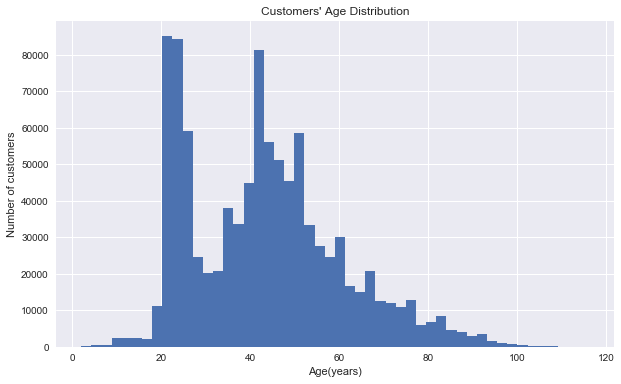

In [61]:
train['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

- 성별, 외국인, 사망여부

Text(0.5,1,'death')

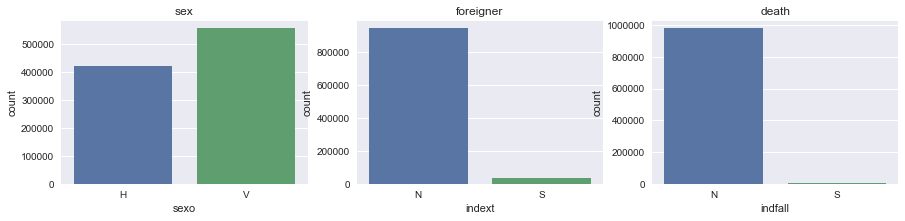

In [66]:
f, ax = plt.subplots(1, 3, figsize = (15, 3))
sns.countplot(x='sexo', data=train, ax=ax[0])
ax[0].set_title('sex')
sns.countplot(x='indext', data=train, ax=ax[1])
ax[1].set_title('foreigner')
sns.countplot(x='indfall', data=train, ax=ax[2])
ax[2].set_title('death')

In [70]:
df_s = train.loc[:, ['sexo']].join(train.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_s = df_s.groupby(['sexo']).sum()
df_s = df_s.T
df_s

sexo,H,V
ind_ahor_fin_ult1,46.0,129.0
ind_aval_fin_ult1,9.0,26.0
ind_cco_fin_ult1,327545.0,412550.0
ind_cder_fin_ult1,83.0,496.0
ind_cno_fin_ult1,41303.0,63239.0
ind_ctju_fin_ult1,6442.0,7023.0
ind_ctma_fin_ult1,3931.0,5725.0
ind_ctop_fin_ult1,78415.0,131133.0
ind_ctpp_fin_ult1,27523.0,43846.0
ind_deco_fin_ult1,829.0,1175.0


Text(0.5,1,'Popularity of products by sex')

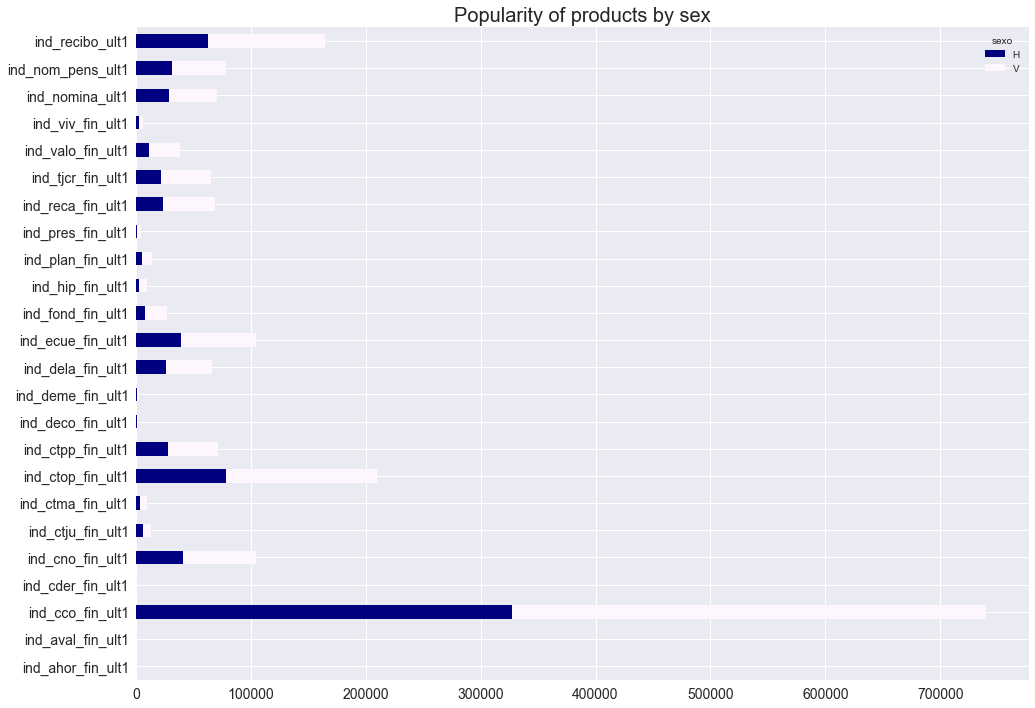

In [71]:
df_s.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex', fontsize=20)
#성별별로 다른 양상 보이는 상품은?

In [73]:
train["tot_products"].value_counts()

1.0     555217
2.0     190406
3.0      78370
4.0      44520
5.0      29992
0.0      29188
6.0      22830
7.0      15888
8.0       8644
9.0       3972
10.0      1401
11.0       490
12.0       136
13.0        28
14.0         5
15.0         1
Name: tot_products, dtype: int64

- 수입

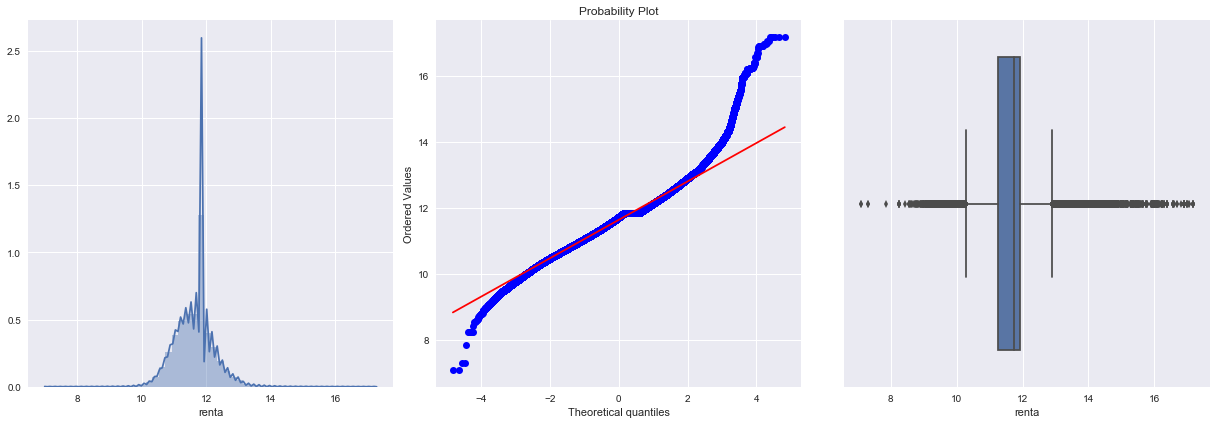

count    981088.000000
mean         11.645235
std           0.588254
min           7.092349
25%          11.260102
50%          11.726166
75%          11.910186
max          17.179158
Name: renta, dtype: float64 

Skewness: 0.254965
Kurtosis: 1.921806


In [96]:
renta = np.log(train['renta'])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(renta)

plt.subplot(132)
stats.probplot(renta, plot=plt)

plt.subplot(133)
sns.boxplot(renta)
plt.tight_layout()
plt.show()

print(renta.describe(),"\n")

print("Skewness: %f" % renta.skew())
print("Kurtosis: %f" % renta.kurt())

In [87]:
df_i = (train.groupby(pd.cut(train['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())

In [75]:
df_i["tot_products"]

renta
[0.0, 60000.0)          211668.0
[60000.0, 120000.0)     627900.0
[120000.0, 180000.0)    651561.0
[180000.0, 240000.0)    189461.0
[240000.0, inf)         193166.0
Name: tot_products, dtype: float64

In [88]:
df_i = df_i.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_i = df_i.T
df_i

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,14.0,34.0,65.0,30.0,32.0
ind_aval_fin_ult1,2.0,6.0,6.0,15.0,6.0
ind_cco_fin_ult1,106217.0,260898.0,253699.0,58723.0,60558.0
ind_cder_fin_ult1,63.0,163.0,212.0,70.0,71.0
ind_cno_fin_ult1,10685.0,35311.0,35919.0,11555.0,11072.0
ind_ctju_fin_ult1,989.0,4194.0,5038.0,1730.0,1514.0
ind_ctma_fin_ult1,1104.0,3411.0,3408.0,957.0,776.0
ind_ctop_fin_ult1,19697.0,66593.0,75789.0,23305.0,24164.0
ind_ctpp_fin_ult1,6099.0,23155.0,25572.0,8153.0,8390.0
ind_deco_fin_ult1,227.0,703.0,756.0,161.0,157.0


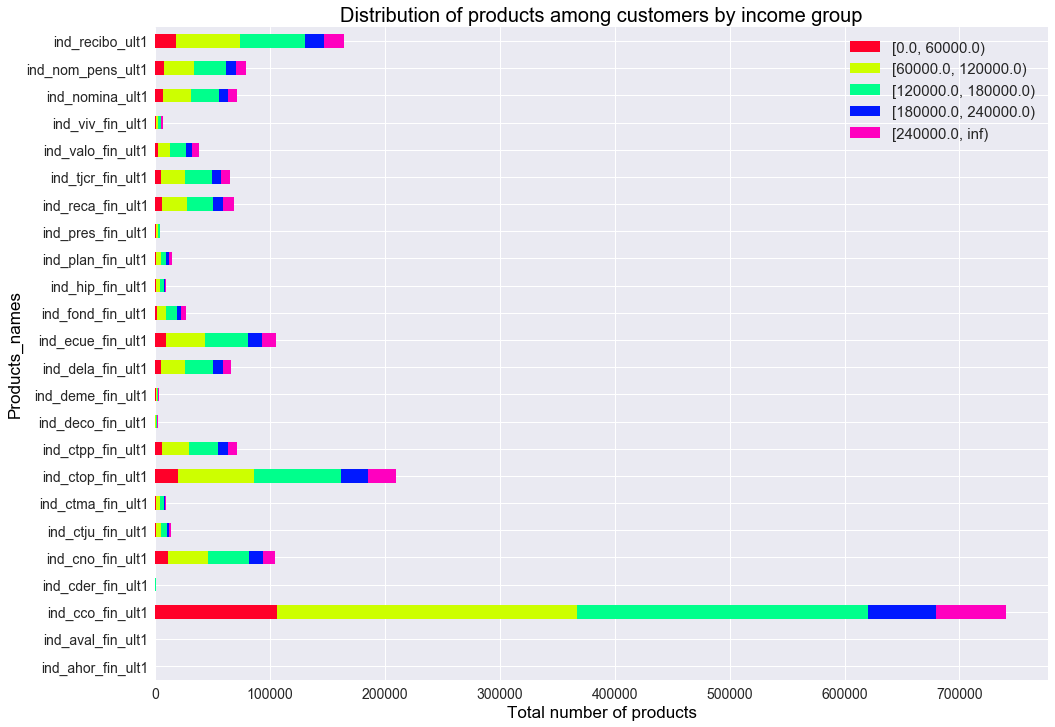

In [89]:
df_i.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

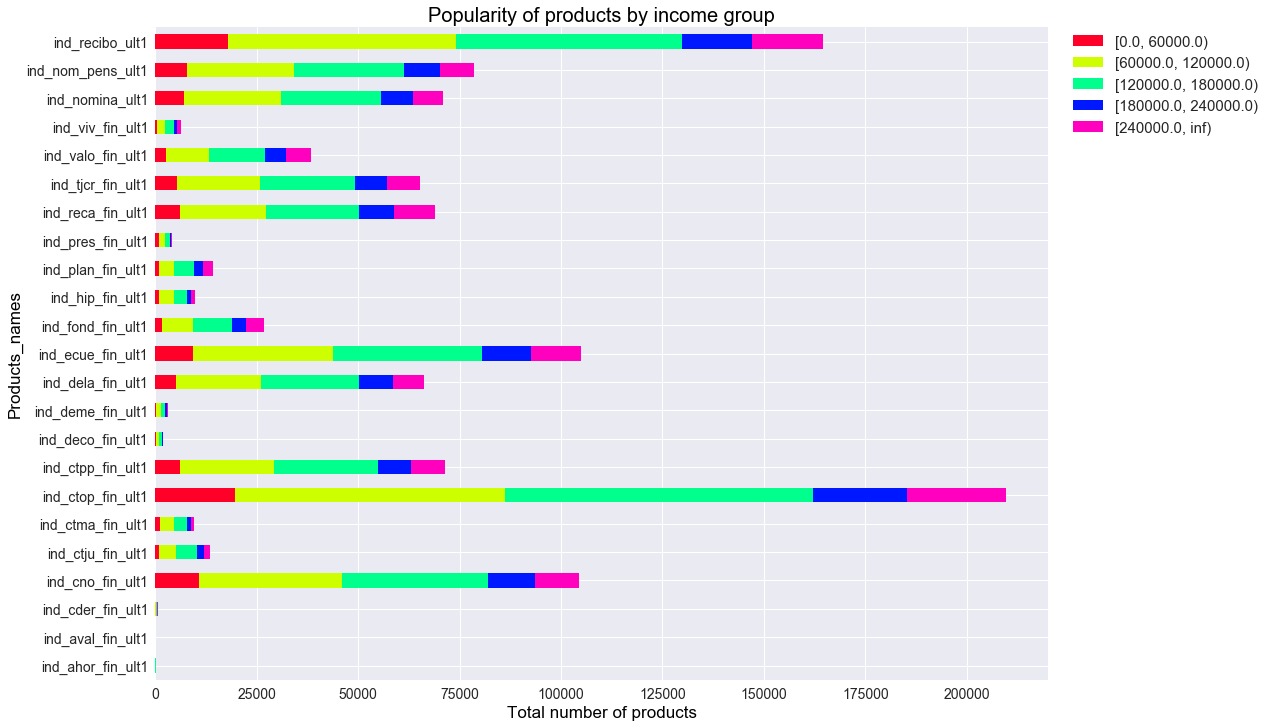

In [90]:
exclude = ['ind_cco_fin_ult1']
df_i = df_i.T
df_i = df_i.drop(exclude, axis=1).T

df_i.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of products by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

- 거주지